# LeetCode

## Link

1. https://leetcode.com/

2. https://leetcode-cn.com/

## Demo

1. https://www.onlinegdb.com/

## Details

LeetCode: 16, 17, 19

# LeetCode 16. 3Sum Closest 整数反转

Given an integer array nums of length n and an integer target, find three integers in nums such that the sum is closest to target.

Return the sum of the three integers.

You may assume that each input would have exactly one solution.

给你一个长度为 n 的整数数组 nums 和 一个目标值 target。请你从 nums 中选出三个整数，使它们的和与 target 最接近。

返回这三个数的和。

假定每组输入只存在恰好一个解。


Example 1:

```
Input: nums = [-1,2,1,-4], target = 1
Output: 2
Explanation: The sum that is closest to the target is 2. (-1 + 2 + 1 = 2).
```

Example 2:

```
Input: nums = [0,0,0], target = 1
Output: 0
```

Constraints:

- 3 <= nums.length <= 1000

- -1000 <= nums[i] <= 1000

- -10^4 <= target <= 10^4

## 解题思路

这一题的解法是用两个指针夹逼的方法。先对数组进行排序，i 从头开始往后面扫。这里同样需要注意数组中存在多个重复数字的问题。具体处理方法很多，可以用 map 计数去重。这里笔者简单的处理，i 在循环的时候和前一个数进行比较，如果相等，i 继续往后移，直到移到下一个和前一个数字不同的位置。j，k 两个指针开始一前一后夹逼。j 为 i 的下一个数字，k 为数组最后一个数字，由于经过排序，所以 k 的数字最大。j 往后移动，k 往前移动，逐渐夹逼出最接近 target 的值。

这道题还可以用暴力解法，三层循环找到距离 target 最近的组合。

In [1]:
from typing import List
class Solution:
    def threeSumClosest(self, nums: List[int], target: int) -> int:
        n = len(nums)
        nums.sort()
        re_min = 0 #存储当前最小的差值
        for i in range(n):
            low = i+1
            high = n-1
            while low < high:
                three_sum = nums[i] + nums[low] + nums[high]
                x = target - three_sum #当前三数的差值
                if re_min == 0:
                    re_min = abs(x)
                    sum_min = three_sum #sum_min为当前最接近的和
                if abs(x) < re_min:
                    re_min = abs(x)
                    sum_min = three_sum
                if three_sum == target:
                    return target
                elif three_sum < target:
                    low += 1
                else:
                    high -= 1
        return sum_min

# LeetCode 17. Letter Combinations of a Phone Number 电话号码的字母组合

Given a string containing digits from 2-9 inclusive, return all possible letter combinations that the number could represent. Return the answer in any order.

A mapping of digit to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.

给定一个仅包含数字 2-9 的字符串，返回所有它能表示的字母组合。答案可以按 任意顺序 返回。

给出数字到字母的映射如下（与电话按键相同）。注意 1 不对应任何字母。

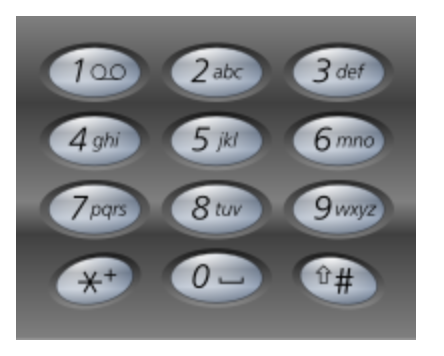

Example 1:

```
Input: digits = "23"
Output: ["ad","ae","af","bd","be","bf","cd","ce","cf"]
```

Example 2:

```
Input: digits = ""
Output: []
```

Example 3:

```
Input: digits = "2"
Output: ["a","b","c"]
```


Constraints:

- 0 <= digits.length <= 4

- digits[i] is a digit in the range ['2', '9'].(digits[i] 是范围 ['2', '9'] 的一个数字。)



## 解题思路

DFS 递归深搜

## Reference

1. https://www.bilibili.com/video/BV1cy4y167mM/

```
class Solution(object):
    def letterCombinations(self, digits):
        """
        动态规划
        dp[i]: 前i个字母的所有组合
        由于dp[i]只与dp[i-1]有关,可以使用变量代替列表存储降低空间复杂度
        :type digits: str
        :rtype: List[str]
        """
        if not digits:
            return []
        d = {'2': 'abc', '3': 'def', '4': 'ghi', '5': 'jkl',
             '6': 'mno', '7': 'pqrs', '8': 'tuv', '9': 'wxyz'}
        n = len(digits)
        dp = [[] for _ in range(n)]
        dp[0] = [x for x in d[digits[0]]]
        for i in range(1, n):
            dp[i] = [x + y for x in dp[i - 1] for y in d[digits[i]]]
        return dp[-1]

    def letterCombinations2(self, digits):
        """
        使用变量代替上面的列表
        降低空间复杂度
        :type digits: str
        :rtype: List[str]
        """
        if not digits:
            return []
        d = {'2': 'abc', '3': 'def', '4': 'ghi', '5': 'jkl',
             '6': 'mno', '7': 'pqrs', '8': 'tuv', '9': 'wxyz'}
        n = len(digits)
        res = ['']
        for i in range(n):
            res = [x + y for x in res for y in d[digits[i]]]
        return res

    def letterCombinations3(self, digits):
        """
        递归
        :param digits:
        :return:
        """
        d = {'2': 'abc', '3': 'def', '4': 'ghi', '5': 'jkl',
             '6': 'mno', '7': 'pqrs', '8': 'tuv', '9': 'wxyz'}
        if not digits:
            return []
        if len(digits) == 1:
            return [x for x in d[digits[0]]]
        return [x + y for x in d[digits[0]] for y in self.letterCombinations3(digits[1:])]
```

In [2]:
class Solution(object):
    def letterCombinations(self, digits):
        if not digits:
            return []
        d = {'2': 'abc', '3': 'def', '4': 'ghi', '5': 'jkl',
             '6': 'mno', '7': 'pqrs', '8': 'tuv', '9': 'wxyz'}
        n = len(digits)
        dp = [[] for _ in range(n)]
        dp[0] = [x for x in d[digits[0]]]
        for i in range(1, n):
            dp[i] = [x + y for x in dp[i - 1] for y in d[digits[i]]]
        return dp[-1]

# LeetCode 19. Remove Nth Node From End of List 删除链表的倒数第 N 个结点

Given the head of a linked list, remove the $n^{th}$ node from the end of the list and return its head.

给你一个链表，删除链表的倒数第 n 个结点，并且返回链表的头结点。


Example 1:

```
Input: head = [1,2,3,4,5], n = 2
Output: [1,2,3,5]
```

Example 2:

```
Input: head = [1], n = 1
Output: []
```

Example 3:

```
Input: head = [1,2], n = 1
Output: [1]
```

Constraints:

- The number of nodes in the list is sz.(链表中结点的数目为 sz)

- 1 <= sz <= 30

- 0 <= Node.val <= 100

- 1 <= n <= sz

Follow up: Could you do this in one pass?(你能尝试使用一趟扫描实现吗？)

## 解题思路

- 先循环一次拿到链表的总长度，然后循环到要删除的结点的前一个结点开始删除操作。需要注意的一个特例是，有可能要删除头结点，要单独处理。

- 这道题有一种特别简单的解法。设置 2 个指针，一个指针距离前一个指针 n 个距离。同时移动 2 个指针，2 个指针都移动相同的距离。当一个指针移动到了终点，那么前一个指针就是倒数第 n 个节点了。

## Reference

https://stackoverflow.com/questions/61610160/remove-nth-node-from-end-of-listleetcode-python

In [3]:
"""
class Solution:
    def removeNthFromEnd(self, head: ListNode, n: int) -> ListNode:
        head_dummy = ListNode()
        head_dummy.next = head

        slow, fast = head_dummy, head_dummy
        while(n!=0): # fast先往前走n步
            fast = fast.next
            n -= 1
        while(fast.next!=None):
            slow = slow.next
            fast = fast.next
        # fast 走到结尾后，slow 的下一个节点为倒数第N个节点
        slow.next = slow.next.next # 删除
        return head_dummy.next
"""
class Solution:
    def removeNthFromEnd(self, head, n):
        fast = slow = head
        for _ in range(n):
            fast = fast.next
        if not fast:
            return head.next
        while fast.next:
            fast = fast.next
            slow = slow.next
        slow.next = slow.next.next
        return head
